**Step 1: Setting Up Environment**

**1.Install Necessary Libraries:**

Install libraries like TensorFlow or PyTorch for deep learning, along with other dependencies.

In [1]:
pip install tensorflow matplotlib nltk

**2.Import Libraries:**

Import the required libraries in your Jupyter notebook.


In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import nltk

**Step 2: Load and Preprocess Data**

**1.Load Image Dataset:**

Use a dataset like CIFAR-10 for image recognition.

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


**2.Tokenize Text Data:**

For natural language processing, tokenize and preprocess text data.

In [5]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

sample_text = ["This is a positive sentence.", "Negative sentiment in this text.", "Neutral statement here.", "Another positive example."]
tokens = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Step 3: Build Deep Neural Network Models**

**1.Image Recognition Model:**

Build a convolutional neural network (CNN) for image recognition.

In [6]:
from tensorflow.keras import layers, models

# Define the Image Recognition Model
model_img = models.Sequential()

# Convolutional Layers
model_img.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_img.add(layers.MaxPooling2D((2, 2)))
model_img.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_img.add(layers.MaxPooling2D((2, 2)))
model_img.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Flatten Layer
model_img.add(layers.Flatten())

# Dense Layers
model_img.add(layers.Dense(128, activation='relu'))
model_img.add(layers.Dropout(0.5))  # Optional Dropout for regularization
model_img.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

# Compile the Model
model_img.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display Model Summary
model_img.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

**2.Natural Language Processing Model:**

Create a simple neural network for text classification.

In [17]:
# Sample Labels (Assuming binary sentiment classification)
labels = [1, 0, 2, 1]

# Tokenize the Sample Text Data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(sample_text)
sequences = tokenizer.texts_to_sequences(sample_text)
padded_sequences = pad_sequences(sequences, maxlen=20, truncating='post')

# Define the Natural Language Processing Model
model_nlp = models.Sequential()

# Embedding Layer
vocab_size = 10000
embedding_dim = 16
max_length = 20
model_nlp.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))

# LSTM Layers (or use GRU layers)
model_nlp.add(layers.LSTM(64, return_sequences=True))
model_nlp.add(layers.LSTM(64))

# Dense Layers
model_nlp.add(layers.Dense(64, activation='relu'))
model_nlp.add(layers.Dropout(0.5))  # Optional Dropout for regularization
model_nlp.add(layers.Dense(1, activation='sigmoid'))  # Binary classification, adjust for multi-class

# Compile the Model
model_nlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display Model Summary
model_nlp.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 16)            160000    
                                                                 
 lstm_6 (LSTM)               (None, 20, 64)            20736     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 217985 (851.50 KB)
Trainable params: 217

**Step 4: Train and Evaluate Models**

**1.Train Image Recognition Model:**

Train the image recognition model with the image dataset.

In [8]:
history_img = model_img.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 48s 30ms/step - loss: 2.1085 - accuracy: 0.2456 - val_loss: 1.6216 - val_accuracy: 0.4093
Epoch 2/10
1563/1563 [==============================] - 45s 28ms/step - loss: 1.6159 - accuracy: 0.4123 - val_loss: 1.4613 - val_accuracy: 0.4743
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4341 - accuracy: 0.4892 - val_loss: 1.2981 - val_accuracy: 0.5355
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.3353 - accuracy: 0.5308 - val_loss: 1.2177 - val_accuracy: 0.5666
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2438 - accuracy: 0.5641 - val_loss: 1.2776 - val_accuracy: 0.5627
Epoch 6/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1816 - accuracy: 0.5880 - val_loss: 1.1078 - val_accuracy: 0.6205
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1404 - accuracy: 0.6070 - val_loss: 1.2504 -

**2.Train Natural Language Processing Model:**

Train the NLP model with the tokenized text data.

In [19]:
import numpy as np

# Convert 'labels' to NumPy array
labels = np.array(labels)

# Train the NLP Model with Validation Data
history_nlp = model_nlp.fit(padded_sequences, labels, epochs=5, validation_data=(padded_sequences, labels))


Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.6930 - accuracy: 0.2500 - val_loss: 0.6857 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 36ms/step - loss: 0.6811 - accuracy: 0.5000 - val_loss: 0.6777 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 38ms/step - loss: 0.6730 - accuracy: 0.5000 - val_loss: 0.6697 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 50ms/step - loss: 0.6786 - accuracy: 0.5000 - val_loss: 0.6608 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 44ms/step - loss: 0.6584 - accuracy: 0.5000 - val_loss: 0.6497 - val_accuracy: 0.5000


**Step 5: Visualize Results**

**1.Image Recognition Model Training History Visualization:**

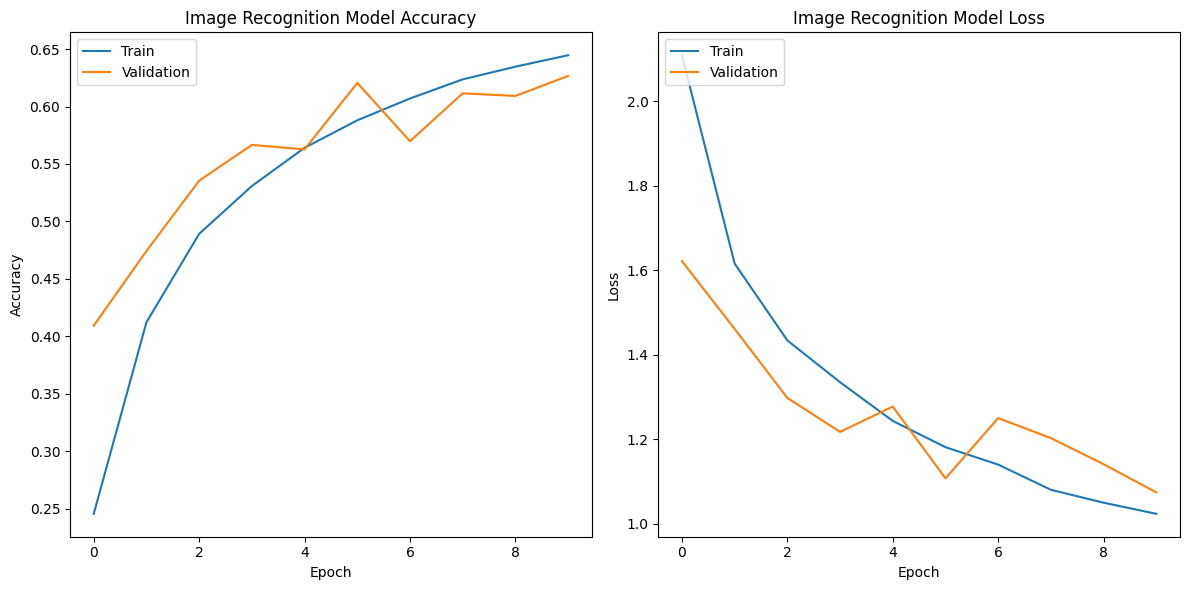

In [25]:
# Plot Image Recognition Model Training History
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_img.history['accuracy'])
plt.plot(history_img.history['val_accuracy'])
plt.title('Image Recognition Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_img.history['loss'])
plt.plot(history_img.history['val_loss'])
plt.title('Image Recognition Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


**2.Natural Language Processing Model Training History Visualization:**

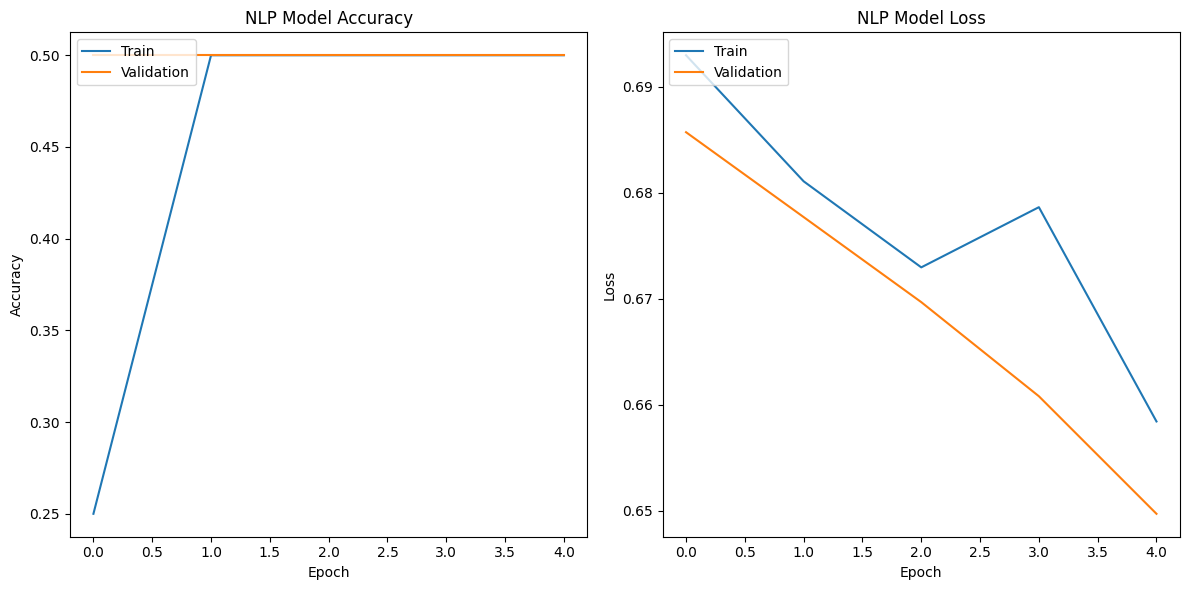

In [26]:
# Plot NLP Model Training History
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_nlp.history['accuracy'])
plt.plot(history_nlp.history['val_accuracy'])
plt.title('NLP Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_nlp.history['loss'])
plt.plot(history_nlp.history['val_loss'])
plt.title('NLP Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

**3.Image Recognition Model Confusion Matrix:**

313/313 [==============================] - 3s 9ms/step


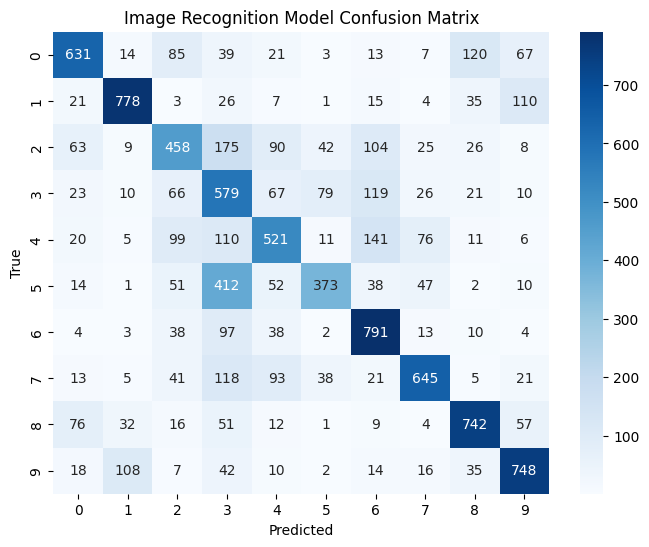

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions using the trained model
predictions_img = model_img.predict(test_images)
y_pred_img = np.argmax(predictions_img, axis=1)

# Create confusion matrix
cm_img = confusion_matrix(test_labels, y_pred_img)

# Plot Confusion Matrix for Image Recognition Model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_img, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Image Recognition Model Confusion Matrix')
plt.show()

**4.Additional Metrics for Natural Language Processing (NLP) Model:**

In [28]:
from sklearn.metrics import classification_report, accuracy_score

# Generate predictions using the trained NLP model
predictions_nlp = model_nlp.predict(padded_sequences)
y_pred_nlp = (predictions_nlp > 0.5).astype(int)

# Print Classification Report for NLP Model
print("NLP Model Classification Report:")
print(classification_report(labels, y_pred_nlp))

# Calculate and Print Accuracy for NLP Model
accuracy_nlp = accuracy_score(labels, y_pred_nlp)
print(f"NLP Model Accuracy: {accuracy_nlp}")

1/1 [==============================] - 1s 861ms/step
NLP Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         2
           2       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.17      0.33      0.22         4
weighted avg       0.25      0.50      0.33         4

NLP Model Accuracy: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
